In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn import ensemble
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [109]:
# df = pd.read_csv('non_null_data.csv')
# df = pd.read_csv('preprocessed_data.csv')
df = pd.read_csv('pre_school_and_hos.csv')
print(df.shape)
print(df.columns)


(4384, 20)
Index(['last_update', 'address.lat', 'address.lon', 'lot_size.size',
       'prop_type', 'year_built', 'beds', 'price', 'baths_full', 'baths_half',
       'is_new_construction', 'address.neighborhood_name',
       'building_size.size', 'garage', 'Zip Code', 'Population',
       '% Unemployment Rate', 'Avg. Income/H/hold', 'Avg_Pts_Earn',
       'Num_Hospitals'],
      dtype='object')


In [86]:
# Choose a narrowed down list of features to build the model with
df2 = df[['address.lat', 'address.lon', 'lot_size.size', 'prop_type', 'Zip Code', 'year_built', 'price', 'baths_full', 'baths_half','is_new_construction','building_size.size', 'garage', 'Avg. Income/H/hold', 'address.neighborhood_name']]

# remove outlier prices based on box-whisker plot results
df2 = df2[df2.price <= 695000]
# remove outlier building sizes based on box-whisker plot results
df2 = df2[df2['building_size.size'] <= 2723.0]
# encode zip code
zip_ohe = pd.get_dummies(df2['Zip Code'], prefix='zip')
# nbhd_ohe = pd.get_dummies(df2['address.neighborhood_name'], prefix='nbhd')
df2 = df2.drop('Zip Code',axis = 1)
df2 = df2.drop('address.neighborhood_name',axis = 1)
# # Join the encoded df
df3 = pd.concat([df2, zip_ohe], axis=1)

# # encode property type
labelencoder = LabelEncoder()
df3['prop_type'] = labelencoder.fit_transform(df3['prop_type'])
print(df3.shape)
print(df3.head())
print(df3.isnull().sum())
print(df3.columns)

(4053, 59)
   address.lat  address.lon  lot_size.size  last_update  prop_type  \
0    39.926237   -75.176307          700.0       719163          1   
1    40.069313   -75.075879         3171.0       719163          1   
2    40.001261   -75.117655          602.0       719163          1   
3    39.987430   -75.100497          909.0       719163          1   
5    39.932317   -75.158763          588.0       719163          1   

   year_built     price  baths_full  baths_half  is_new_construction  ...  \
0      1920.0  160000.0         1.0         0.0                    0  ...   
1      1957.0  265000.0         1.0         1.0                    0  ...   
2      1920.0   25000.0         1.0         0.0                    0  ...   
3      1920.0  265000.0         1.0         1.0                    0  ...   
5      1915.0  396000.0         1.0         1.0                    0  ...   

   zip_19145  zip_19146  zip_19147  zip_19148  zip_19149  zip_19150  \
0          1          0          0

In [87]:
# Split the data into two subsets and normalize the features of samples
#changed to df2 for poly features
house_fea = df3.drop('price', axis=1).values
house_res = df3['price'].values

# Split the dataset into the train_val set and testing set.
X_train, X_test, y_train, y_test = train_test_split(house_fea, house_res, 
                                                            test_size=0.2, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train.shape[0], X_test.shape[0]))

# Normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)
print(X_train[:5,:5])

train_val: 3242, test: 811
[[-0.63838923 -0.62333625 -0.0179802   0.         -0.40968517]
 [-1.35552847 -0.31461436 -0.0179802   0.         -0.40968517]
 [ 1.07857711  0.68590967 -0.01682034  0.         -0.40968517]
 [-0.09312997  0.08852297 -0.01843584  0.         -0.40968517]
 [ 0.25205808  1.05898322 -0.01551783  0.          2.26813604]]


ridge
bias is 268170.9398519552
coefficients  are [ -8198.26608747  13582.38186393   -707.19739677      0.
  10244.73873705   6267.66774238  26197.17256008  17513.06557838
   6719.55890123  45696.04651172   6152.32803435   7649.78269845
  11039.33799221  19220.2435316     240.79171734  13720.99430067
  12972.54979198 -10247.62774345  -7236.35891746  -6144.04026225
  -5328.31249068  14669.13209412   2907.97655618 -12975.62540484
    -73.52508116   6127.72873797  16789.01617652 -18584.18431589
  16777.47400348  -6956.81064303   2895.0061025    7496.20246247
   5972.85971506  25441.46581295 -10041.98393121 -11658.49314258
  -6489.32593872 -11599.69458871 -14938.61168047 -11059.51681739
  -4045.50827376  -8769.92688529  -6869.46804798 -13058.58750575
 -10464.97372206  -8925.34794526  -3667.73423439  -8139.22356355
   5166.64717408  20256.34504033  30404.15317343  12286.92248894
 -10316.61819882  -2939.42264878  -6012.15103341  -5722.82014341
  -5341.34407185  -9352.97193085]
prediction for

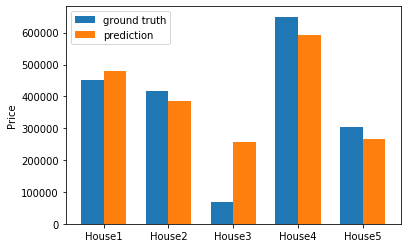

                             coef
building_size.size   45696.046512
zip_19147            30404.153173
baths_full           26197.172560
zip_19130            25441.465813
zip_19146            20256.345040
zip_19103            19220.243532
baths_half           17513.065578
zip_19123            16789.016177
zip_19125            16777.474003
zip_19118            14669.132094
zip_19106            13720.994301
address.lon          13582.381864
zip_19107            12972.549792
zip_19148            12286.922489
zip_19102            11039.337992
prop_type            10244.738737
Avg. Income/H/hold    7649.782698
zip_19128             7496.202462
is_new_construction   6719.558901
year_built            6267.667742
garage                6152.328034
zip_19122             6127.728738
zip_19129             5972.859715
zip_19145             5166.647174
zip_19119             2907.976556
zip_19127             2895.006103
zip_19104              240.791717
last_update              0.000000
zip_19121     

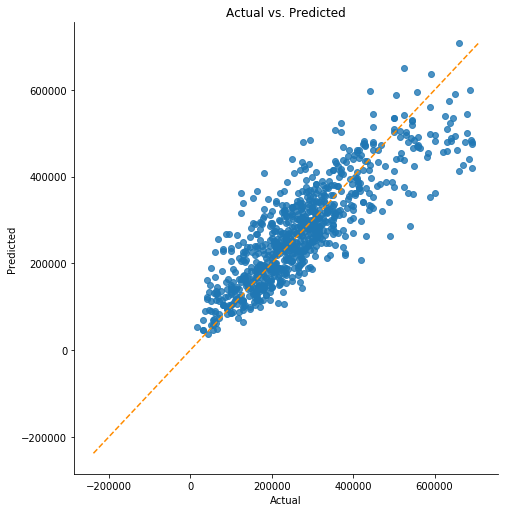

If non-linearity is apparent, consider adding a polynomial term
lasso
bias is 268170.9398519564
coefficients  are [ -7970.26395546  14289.96781329   -706.06583875      0.
  10253.71380511   6263.95343014  26194.95247231  17510.3602332
   6717.00874102  45709.16525073   6151.87445438  12940.79599956
  11140.35378371  19267.72933652   1239.09433977  12442.84688661
  13619.28527075 -10458.96853777  -7798.56951114  -6481.98001106
  -6083.12009435  13519.5079437    2211.82142843 -12514.77921839
   2080.54455502   7446.81757186  17849.4656754  -17721.41290784
  17784.49624994  -6809.74546485   2639.78856191   6905.09495241
   6103.32521664  25440.53133038  -9426.23569898 -10419.27339635
  -5393.53072474  -9802.12325033 -14800.39496591 -11082.02480746
  -3792.30120644  -8369.69202477  -5636.78602213 -11936.05851028
  -9939.82738656  -8046.04715093  -2380.07820511  -7290.54227004
   6531.76445598  22057.31239366  30869.24082351  13796.25391265
 -10417.7591327   -3230.85454059  -5608.66443247  

C:\Users\hagem\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382162760697.166, tolerance: 5893054604.138728
  positive)


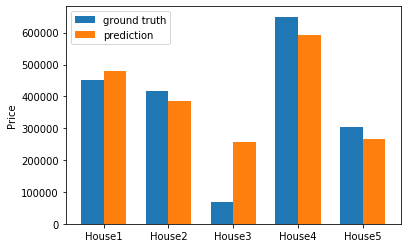

                             coef
building_size.size   45709.165251
zip_19147            30869.240824
baths_full           26194.952472
zip_19130            25440.531330
zip_19146            22057.312394
zip_19103            19267.729337
zip_19123            17849.465675
zip_19125            17784.496250
baths_half           17510.360233
address.lon          14289.967813
zip_19148            13796.253913
zip_19107            13619.285271
zip_19118            13519.507944
Avg. Income/H/hold   12940.796000
zip_19106            12442.846887
zip_19102            11140.353784
prop_type            10253.713805
zip_19122             7446.817572
zip_19128             6905.094952
is_new_construction   6717.008741
zip_19145             6531.764456
year_built            6263.953430
garage                6151.874454
zip_19129             6103.325217
zip_19127             2639.788562
zip_19119             2211.821428
zip_19121             2080.544555
zip_19104             1239.094340
last_update   

In [88]:
class Regression:
    
    def __init__(self, kind, X_train, X_test, y_train, y_test, df):
        self.kind = kind
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.df = df
        
    def run_regression(self):
        if self.kind == 1:
            print("lasso")
            regressor = self.train_lasso(self.X_train, self.X_test, self.y_train, self.y_test)
            predicted = self.test_lasso(self.X_train, self.X_test, self.y_train, self.y_test, regressor)
        elif self.kind == 2:
            print("ridge")
            regressor = self.train_ridge(self.X_train, self.X_test, self.y_train, self.y_test)
            predicted = self.test_ridge(self.X_train, self.X_test, self.y_train, self.y_test, regressor)
            self.linear_assumption(predicted)
        
    def linear_assumption(self, predictions):
       
        df_results = pd.DataFrame({'Actual': self.y_test, 'Predicted': predictions})
        df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
        """
        Linearity: Assumes there is a linear relationship between the predictors and
                   the response variable. If not, either a polynomial term or another
                   algorithm should be used.
        """
        print('\n=======================================================================================')
        print('Assumption 1: Linear Relationship between the Target and the Features')
        
        print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')
        
        # Plotting the actual vs predicted values
        sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
        
        # Plotting the diagonal line
        line_coords = np.arange(df_results.min().min(), df_results.max().max())
        plt.plot(line_coords, line_coords,  # X and y points
                 color='darkorange', linestyle='--')
        plt.title('Actual vs. Predicted')
        plt.show()
        print('If non-linearity is apparent, consider adding a polynomial term')
        
    def train_lasso(self, X_train, X_test, y_train, y_test):
        # Train the ridge regression model lambda = 0.1
        lr = Lasso(alpha=1)

        lr.fit(self.X_train, self.y_train)

        print("bias is "+str(lr.intercept_))
        print("coefficients  are "+str(lr.coef_))

        y_train_pred = lr.predict(self.X_train)

        mae = mean_absolute_error(y_train_pred, self.y_train)
        mse = mean_squared_error(y_train_pred , self.y_train)
        rmse = np.sqrt(mse)

        print('prediction for training set: Lasso')
        print('MAE is: {}'.format(mae))
        print('MSE is: {}'.format(mse))
        print('RMSE is: {}'.format(rmse))
        print('R-Squared is: {}'.format(lr.score(self.X_train, self.y_train)))
        return lr
        
    def test_lasso(self, X_train, X_test, y_train, y_test, lr):
        y_test_pred = lr.predict(self.X_test)
        mae = mean_absolute_error(y_test_pred, self.y_test)
        mse = mean_squared_error(y_test_pred, self.y_test)
        rmse = np.sqrt(mse)

        print('prediction for testing set: Lasso')
        print('MAE is: {}'.format(mae))
        print('MSE is: {}'.format(mse))
        print('RMSE is: {}'.format(rmse))
        print('R-Squared is: {}'.format(lr.score(self.X_test, self.y_test)))

        # Visualize the Ridge Regression model
        labels = ['House1', 'House2', 'House3', 'House4', 'House5']
        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars

        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
        rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

        ax.set_ylabel('Price')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()

        plt.show()
        
        self.show_coeff(lr)
        
    def train_ridge(self, X_train, X_test, y_train, y_test):
        # Train the ridge regression model lambda = 0.1
        rr = Ridge(alpha=1)

        rr.fit(self.X_train, self.y_train)

        print("bias is "+str(rr.intercept_))
        print("coefficients  are "+str(rr.coef_))

        y_train_pred = rr.predict(self.X_train)

        mae = mean_absolute_error(y_train_pred, self.y_train)
        mse = mean_squared_error(y_train_pred , self.y_train)
        rmse = np.sqrt(mse)

        print('prediction for training set:')
        print('MAE is: {}'.format(mae))
        print('MSE is: {}'.format(mse))
        print('RMSE is: {}'.format(rmse))
        print('R-Squared is: {}'.format(rr.score(self.X_train, self.y_train)))
        return rr
    
    def test_ridge(self, X_train, X_test, y_train, y_test, rr):
        y_test_pred = rr.predict(self.X_test)
        predicted = y_test_pred
        mae = mean_absolute_error(y_test_pred, self.y_test)
        mse = mean_squared_error(y_test_pred, self.y_test)
        rmse = np.sqrt(mse)

        print('prediction for testing set: Ridge')
        print('MAE is: {}'.format(mae))
        print('MSE is: {}'.format(mse))
        print('RMSE is: {}'.format(rmse))
        print('R-Squared is: {}'.format(rr.score(self.X_test, self.y_test)))

        # Visualize the Ridge Regression model
        labels = ['House1', 'House2', 'House3', 'House4', 'House5']
        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars

        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
        rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

        ax.set_ylabel('Price')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()

        plt.show()
        
        self.show_coeff(rr)
        return predicted
        
    def show_coeff(self, rr):
        headers = list(self.df.columns.values)
        headers.remove('price')
        res = pd.DataFrame(rr.coef_, 
             headers, 
             columns=['coef']).sort_values(by='coef', ascending=False)
        print(res)
        
rr = Regression(2, X_train, X_test, y_train, y_test, df3)
rr.run_regression()

lr = Regression(1, X_train, X_test, y_train, y_test, df3)
lr.run_regression()

In [89]:
# Tomorrow: tweak the X_train, X_test features to optimize model.
print(df.columns)
print(df3.head())

Index(['Unnamed: 0', 'Unnamed: 0.1', 'last_update', 'address.lat',
       'address.lon', 'lot_size.size', 'prop_type', 'year_built', 'beds',
       'price', 'baths_full', 'baths_half', 'is_new_construction',
       'address.postal_code', 'address.neighborhood_name',
       'building_size.size', 'garage', 'Zip Code', 'Population',
       '% Unemployment Rate', 'Avg. Income/H/hold'],
      dtype='object')
   address.lat  address.lon  lot_size.size  last_update  prop_type  \
0    39.926237   -75.176307          700.0       719163          1   
1    40.069313   -75.075879         3171.0       719163          1   
2    40.001261   -75.117655          602.0       719163          1   
3    39.987430   -75.100497          909.0       719163          1   
5    39.932317   -75.158763          588.0       719163          1   

   year_built     price  baths_full  baths_half  is_new_construction  ...  \
0      1920.0  160000.0         1.0         0.0                    0  ...   
1      1957.0  265

In [90]:
# Polynomial regression test
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(X_train)
xtest_poly=polyfeat.fit_transform(X_test)

poly = Ridge(alpha=20000)
poly.fit(xtrain_poly, y_train)
polypred=poly.predict(xtest_poly)
mean_se=mean_squared_error(y_test,polypred)
print('prediction for testing set: Poly')
print('MAE is: {}'.format(mean_absolute_error(polypred, y_test)))
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_se), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, y_train), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, y_test), 3))


prediction for testing set: Poly
MAE is: 52493.17717618515
Root Mean Squared Error (RMSE)  69964.55
R-squared (training)  0.816
R-squared (testing)  0.741


In [108]:
# Test gradient boosting

clf = ensemble.GradientBoostingRegressor(n_estimators=1000, max_depth=4, min_samples_split=4, learning_rate=0.04, loss='ls', subsample=.6)
clf.fit(X_train, y_train)
gbpred = clf.predict(X_test)
print('MAE is: {}'.format(mean_absolute_error(gbpred, y_test)))
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error(y_test,gbpred)), 2))
print('R-squared (training) ', round(clf.score(X_train, y_train), 3))
print('R-squared (testing) ', round(clf.score(X_test, y_test), 3))

MAE is: 43818.0578690639
Root Mean Squared Error (RMSE)  59671.48
R-squared (training)  0.948
R-squared (testing)  0.811
